In [1]:
import numpy as np
import matplotlib.pyplot as plt
import colour

import scipy.io as sio
from scipy.optimize import curve_fit

from pyciede2000 import ciede2000

import glob

import robsblobs
from robsblobs.monitor import Monitor

import seaborn as sns
import pandas as pd

sns_red = sns.color_palette()[3]
sns_green = sns.color_palette()[2]
sns_blue = sns.color_palette()[9]

rgb_palette = [sns_red, sns_green, sns_blue]

In [2]:
srgb_xyY = np.array([[0.64, 0.33, 0.2126*100],
                     [0.30, 0.60, 0.7152*100],
                     [0.15, 0.06, 0.0722*100]])
srgb_XYZ = robsblobs.cie_standard.xyY2XYZ(srgb_xyY.T)

srgb_gammas = np.array([2.4, 2.4, 2.4])

In [3]:
srgb_XYZ

array([[ 41.23151515,  35.76      ,  18.05      ],
       [ 21.26      ,  71.52      ,   7.22      ],
       [  1.93272727,  11.92      ,  95.06333333]])

In [4]:
srgb_WP = srgb_XYZ.sum(axis=1)
srgb_WP

array([  95.04151515,  100.        ,  108.91606061])

In [5]:
data = sio.loadmat('./oled_rgb_mode.mat')
oled_spect = data['data']

black = np.array([0, 0, 0])

rs = np.array([[32, 0, 0],
	[64, 0, 0],
	[83, 0, 0],
	[128, 0, 0],
	[160, 0, 0],
	[192, 0, 0],
	[220, 0, 0],
	[255, 0, 0]])

gs = np.array([[0, 32, 0],
	[0, 64, 0],
	[0, 83, 0],
	[0, 128, 0],
	[0, 160, 0],
	[0, 192, 0],
	[0, 220, 0],
	[0, 255, 0]])

bs = np.array([[0, 0, 32],
	[0, 0, 64],
	[0, 0, 83],
	[0, 0, 128],
	[0, 0, 160],
	[0, 0, 192],
	[0, 0, 220],
	[0, 0, 255]])

white = np.array([255, 255, 255])

# the individual intensity levels in 8-bit rgb format
intens = [0, 32, 64, 83, 128, 160, 192, 220, 255]

# the order in which the different primary intensities were displayed
# during browser calibration.
ki = 0
ris = [1, 2, 3, 4, 5, 6, 7, 8]
gis = [9, 10, 11, 12, 13, 14, 15, 16]
bis = [17, 18, 19, 20, 21, 22, 23, 24]
wi = 25

In [6]:
oled_R_max_spectrum = (oled_spect[0][ris[len(ris)-1]][0]['spectralData'][0]).flatten()
oled_R_max_luminance = oled_spect[0][ris[len(ris)-1]][0]['Y'][0][0].flatten()[0]
oled_R_x = oled_spect[0][ris[len(ris)-1]][0]['x'][0][0].flatten()[0]
oled_R_y = oled_spect[0][ris[len(ris)-1]][0]['y'][0][0].flatten()[0]

oled_G_max_spectrum = (oled_spect[0][gis[len(gis)-1]][0]['spectralData'][0]).flatten()
oled_G_max_luminance = oled_spect[0][gis[len(gis)-1]][0]['Y'][0][0].flatten()[0]
oled_G_x = oled_spect[0][gis[len(gis)-1]][0]['x'][0][0].flatten()[0]
oled_G_y = oled_spect[0][gis[len(gis)-1]][0]['y'][0][0].flatten()[0]

oled_B_max_spectrum = (oled_spect[0][bis[len(bis)-1]][0]['spectralData'][0]).flatten()
oled_B_max_luminance = oled_spect[0][bis[len(bis)-1]][0]['Y'][0][0].flatten()[0]
oled_B_x = oled_spect[0][bis[len(bis)-1]][0]['x'][0][0].flatten()[0]
oled_B_y = oled_spect[0][bis[len(bis)-1]][0]['y'][0][0].flatten()[0]

oled_W_max_spectrum = (oled_spect[0][wi][0]['spectralData'][0]).flatten()
oled_W_max_luminance = oled_spect[0][wi][0]['Y'][0][0].flatten()[0]
oled_W_x = oled_spect[0][wi][0]['x'][0][0].flatten()[0]
oled_W_y = oled_spect[0][wi][0]['y'][0][0].flatten()[0]

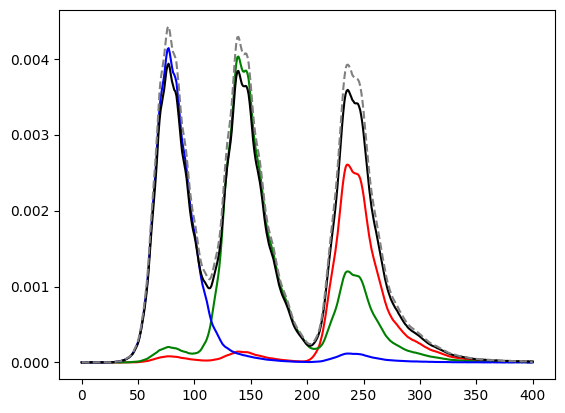

In [7]:
fig = plt.figure()
plt.plot(oled_R_max_spectrum, color="red")
plt.plot(oled_G_max_spectrum, color="green")
plt.plot(oled_B_max_spectrum, color="blue")
plt.plot(oled_W_max_spectrum, color="black")
plt.plot(oled_R_max_spectrum + oled_G_max_spectrum + oled_B_max_spectrum, color="gray", linestyle="dashed")
plt.show()

In [8]:
monxyY_OLED_rob = np.array([[oled_R_x, oled_R_y, oled_R_max_luminance],
                            [oled_G_x, oled_G_y, oled_G_max_luminance],
                            [oled_B_x, oled_B_y, oled_B_max_luminance]])
monxyY_OLED_rob

array([[  6.32600000e-01,   3.30600000e-01,   2.88920000e+01],
       [  2.97900000e-01,   6.01300000e-01,   9.84700000e+01],
       [  1.50900000e-01,   6.30000000e-02,   1.16410000e+01]])

In [9]:
monitor_OLED = Monitor("OLED")

monitor_OLED.set_monxyY(monxyY_OLED_rob)

monitor_OLED.set_R_spectrum(monitor_OLED.wlns, oled_R_max_spectrum, oled_R_max_luminance)
monitor_OLED.set_G_spectrum(monitor_OLED.wlns, oled_G_max_spectrum, oled_G_max_luminance)
monitor_OLED.set_B_spectrum(monitor_OLED.wlns, oled_B_max_spectrum, oled_B_max_luminance)
monitor_OLED.set_W_spectrum(monitor_OLED.wlns, oled_W_max_spectrum, oled_W_max_luminance)
monitor_OLED.calc_spectralQuants()

# monitor_OLED.set_monGamma()

Luminances[ 0 ] =  14.446
Luminances[ 1 ] =  49.235
Luminances[ 2 ] =  5.8205
bigl = 45.275393329  bigm = 24.226106671  bigs = 1.32641551352
L/L+M = 0.651430448681  S/L+M = 0.0190847034023
Red Green Axis
Luminances[ 0 ] =  0.0
Luminances[ 1 ] =  63.7470964669
Luminances[ 2 ] =  5.75440353314
bigl = 42.0778145708  bigm = 27.4236854292  bigs = 1.32641551352
L/L+M = 0.605423114189  S/L+M = 0.0190847034023
Luminances[ 0 ] =  28.892
Luminances[ 1 ] =  34.7229035331
Luminances[ 2 ] =  5.88659646686
bigl = 48.4729720873  bigm = 21.0285279127  bigs = 1.32641551352
L/L+M = 0.697437783174  S/L+M = 0.0190847034023
Blue Yellow Axis
Luminances[ 0 ] =  11.5659258708
Luminances[ 1 ] =  57.9355741292
Luminances[ 2 ] =  0.0
bigl = 45.275393329  bigm = 24.226106671  bigs = 0.176873064414
L/L+M = 0.651430448681  S/L+M = 0.00254488125312
Luminances[ 0 ] =  17.3260741292
Luminances[ 1 ] =  40.5344258708
Luminances[ 2 ] =  11.641
bigl = 45.275393329  bigm = 24.226106671  bigs = 2.47595796262
L/L+M = 0.65143

In [10]:
jing_monitor_data = sio.loadmat('./jing_monitor_primaries_all.mat')

monxyY_Jing = jing_monitor_data['Shanghai_Lenovo']['monxyY'][0][0]

jing_r_spectrum = jing_monitor_data['Shanghai_Lenovo']['red_primary_spectrum'][0][0].flatten()
jing_g_spectrum = jing_monitor_data['Shanghai_Lenovo']['green_primary_spectrum'][0][0].flatten()
jing_b_spectrum = jing_monitor_data['Shanghai_Lenovo']['blue_primary_spectrum'][0][0].flatten()

jing_estimated_w_spectrum = jing_r_spectrum + jing_g_spectrum + jing_b_spectrum

jing_wlns = jing_monitor_data['Shanghai_Lenovo']['wavelength'][0][0].flatten()

jing_R_max_luminance = monxyY_Jing[0, 2]
jing_G_max_luminance = monxyY_Jing[1, 2]
jing_B_max_luminance = monxyY_Jing[2, 2]

jing_estimated_w_luminance = jing_R_max_luminance + jing_G_max_luminance + jing_B_max_luminance

In [11]:
monitor_Jing = Monitor("Jing")
monitor_Jing.set_monxyY(monxyY_Jing)

monitor_Jing.set_R_spectrum(jing_wlns, jing_r_spectrum, jing_R_max_luminance)
monitor_Jing.set_G_spectrum(jing_wlns, jing_g_spectrum, jing_G_max_luminance)
monitor_Jing.set_B_spectrum(jing_wlns, jing_b_spectrum, jing_B_max_luminance)
monitor_Jing.set_W_spectrum(jing_wlns, jing_estimated_w_spectrum, jing_estimated_w_luminance)
monitor_Jing.calc_spectralQuants()

monitor_Jing.set_monGamma(np.array([2.156, 2.2482, 2.178]))

Luminances[ 0 ] =  8.25
Luminances[ 1 ] =  29.5
Luminances[ 2 ] =  4.35
bigl = 27.233358081  bigm = 14.866641919  bigs = 0.822306084094
L/L+M = 0.646873113564  S/L+M = 0.0195322110236
Red Green Axis
Luminances[ 0 ] =  0.0
Luminances[ 1 ] =  37.8197311787
Luminances[ 2 ] =  4.28026882126
bigl = 25.4366780274  bigm = 16.6633219726  bigs = 0.822306084094
L/L+M = 0.60419662773  S/L+M = 0.0195322110236
Luminances[ 0 ] =  16.5
Luminances[ 1 ] =  21.1802688213
Luminances[ 2 ] =  4.41973117874
bigl = 29.0300381346  bigm = 13.0699618654  bigs = 0.822306084094
L/L+M = 0.689549599398  S/L+M = 0.0195322110236
Blue Yellow Axis
Luminances[ 0 ] =  6.21221327112
Luminances[ 1 ] =  35.8877867289
Luminances[ 2 ] =  0.0
bigl = 27.233358081  bigm = 14.866641919  bigs = 0.0910183261092
L/L+M = 0.646873113564  S/L+M = 0.00216195548953
Luminances[ 0 ] =  10.2877867289
Luminances[ 1 ] =  23.1122132711
Luminances[ 2 ] =  8.7
bigl = 27.233358081  bigm = 14.866641919  bigs = 1.55359384208
L/L+M = 0.646873113564 

In [12]:
monitor_P3 = Monitor("P3")
monitor_P3.load_monxyY("./p3_xyY.csv")
monitor_P3.load_spectralData("./SPECTRA_Karl_22-Jun-2023.mat")
monitor_P3.set_monGamma(np.array([2.2, 2.2, 2.2]))

Luminances[ 0 ] =  155.025
Luminances[ 1 ] =  537.3
Luminances[ 2 ] =  58.5
bigl = 487.166752573  bigm = 263.658247427  bigs = 12.9490841739
L/L+M = 0.648841943959  S/L+M = 0.0172464744433
Red Green Axis
Luminances[ 0 ] =  0.0
Luminances[ 1 ] =  693.096695243
Luminances[ 2 ] =  57.7283047566
bigl = 445.042767369  bigm = 305.782232631  bigs = 12.9490841739
L/L+M = 0.592738344313  S/L+M = 0.0172464744433
Luminances[ 0 ] =  310.05
Luminances[ 1 ] =  381.503304757
Luminances[ 2 ] =  59.2716952434
bigl = 529.290737778  bigm = 221.534262222  bigs = 12.9490841739
L/L+M = 0.704945543606  S/L+M = 0.0172464744433
Blue Yellow Axis
Luminances[ 0 ] =  133.053315227
Luminances[ 1 ] =  617.771684773
Luminances[ 2 ] =  0.0
bigl = 487.166752573  bigm = 263.658247427  bigs = 0.647854479857
L/L+M = 0.648841943959  S/L+M = 0.000862856830629
Luminances[ 0 ] =  176.996684773
Luminances[ 1 ] =  456.828315227
Luminances[ 2 ] =  117.0
bigl = 487.166752573  bigm = 263.658247427  bigs = 25.250313868
L/L+M = 0.64

[34.631, 120.06, 13.074, 167.58000000000001, 167.76500000000001]


array([ 0.20665354,  0.71643394,  0.07801647])

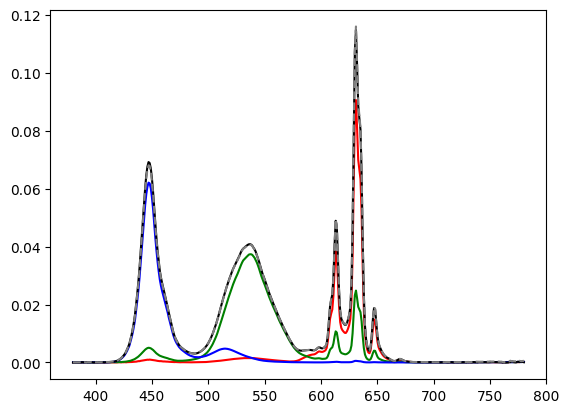

In [13]:
# Karl's monitor was in a mode that limits the maximum that the RGB primaries can reach,
# so we compute a correction factor here based on the reports in the G0 paper that the
# monitor can ideally reach a max of 1500 cd/m2 (confirmed in Apple's tech report about
# the monitor).

rlum = monitor_P3.R_max_luminance
glum = monitor_P3.G_max_luminance
blum = monitor_P3.B_max_luminance

corrf = [monitor_P3.monxyY[0, 2]/rlum,
         monitor_P3.monxyY[1, 2]/glum,
         monitor_P3.monxyY[2, 2]/blum]

monitor_P3.R_max_luminance = monitor_P3.monxyY[0, 2]
monitor_P3.G_max_luminance = monitor_P3.monxyY[1, 2]
monitor_P3.B_max_luminance = monitor_P3.monxyY[2, 2]

wlum = monitor_P3.W_max_luminance

w_corrf = monitor_P3.monWP[1]/wlum

monitor_P3.R_max_spectrum = monitor_P3.R_max_spectrum*corrf[0]
monitor_P3.G_max_spectrum = monitor_P3.G_max_spectrum*corrf[1]
monitor_P3.B_max_spectrum = monitor_P3.B_max_spectrum*corrf[2]

monitor_P3.W_max_spectrum = monitor_P3.W_max_spectrum*w_corrf

monitor_P3.maxRadiance = monitor_P3.W_max_spectrum.sum()

plt.plot(monitor_P3.wlns, monitor_P3.R_max_spectrum, color="red")
plt.plot(monitor_P3.wlns, monitor_P3.G_max_spectrum, color="green")
plt.plot(monitor_P3.wlns, monitor_P3.B_max_spectrum, color="blue")
plt.plot(monitor_P3.wlns, monitor_P3.W_max_spectrum, color="black")
plt.plot(monitor_P3.wlns, monitor_P3.R_max_spectrum + monitor_P3.G_max_spectrum + monitor_P3.B_max_spectrum, color="grey", linestyle="dashed")

print([rlum, glum, blum, wlum, rlum+glum+blum])
[rlum, glum, blum]/wlum

In [14]:
def gamma(x, g, a):
	return a*np.power(x, g)

In [15]:
mons = []

master_lum = 0

spectra_fns = glob.glob('SPECTRA_1*.mat') + glob.glob('SPECTRA_2*.mat')
for fn in spectra_fns:
    d = sio.loadmat(fn)

    mon_spect = d['SPECTRA']

    if mon_spect.shape[0] == 401 or mon_spect.shape[1] <= 25:
        print(mon_spect.shape[1])
        continue

    mon_R_max_spectrum = (mon_spect[0][ris[len(ris)-1]][0]['spectralData'][0]).flatten()
    mon_R_max_luminance = mon_spect[0][ris[len(ris)-1]][0]['Y'][0][0].flatten()[0]
    mon_R_x = mon_spect[0][ris[len(ris)-1]][0]['x'][0][0].flatten()[0]
    mon_R_y = mon_spect[0][ris[len(ris)-1]][0]['y'][0][0].flatten()[0]

    mon_G_max_spectrum = (mon_spect[0][gis[len(gis)-1]][0]['spectralData'][0]).flatten()
    mon_G_max_luminance = mon_spect[0][gis[len(gis)-1]][0]['Y'][0][0].flatten()[0]
    mon_G_x = mon_spect[0][gis[len(gis)-1]][0]['x'][0][0].flatten()[0]
    mon_G_y = mon_spect[0][gis[len(gis)-1]][0]['y'][0][0].flatten()[0]

    mon_B_max_spectrum = (mon_spect[0][bis[len(bis)-1]][0]['spectralData'][0]).flatten()
    mon_B_max_luminance = mon_spect[0][bis[len(bis)-1]][0]['Y'][0][0].flatten()[0]
    mon_B_x = mon_spect[0][bis[len(bis)-1]][0]['x'][0][0].flatten()[0]
    mon_B_y = mon_spect[0][bis[len(bis)-1]][0]['y'][0][0].flatten()[0]

    mon_W_max_spectrum = (mon_spect[0][wi][0]['spectralData'][0]).flatten()
    mon_W_max_luminance = mon_spect[0][wi][0]['Y'][0][0].flatten()[0]

    if mon_W_max_luminance > master_lum:
        master_lum = mon_W_max_luminance

    mon_W_x = mon_spect[0][wi][0]['x'][0][0].flatten()[0]
    mon_W_y = mon_spect[0][wi][0]['y'][0][0].flatten()[0]

    monxyY = np.array([[mon_R_x, mon_R_y, mon_R_max_luminance],
                        [mon_G_x, mon_G_y, mon_G_max_luminance],
                        [mon_B_x, mon_B_y, mon_B_max_luminance]])

    fparts = fn.split('_')
    id = fparts[1].split('(')
    mon = Monitor(id[0])

    mon.set_monxyY(monxyY)

    mon.set_R_spectrum(mon.wlns, mon_R_max_spectrum, mon_R_max_luminance)
    mon.set_G_spectrum(mon.wlns, mon_G_max_spectrum, mon_G_max_luminance)
    mon.set_B_spectrum(mon.wlns, mon_B_max_spectrum, mon_B_max_luminance)
    mon.set_W_spectrum(mon.wlns, mon_W_max_spectrum, mon_W_max_luminance)
    mon.calc_spectralQuants()

    rs = np.zeros((len(ris)+1))
    gs = np.zeros((len(gis)+1))
    bs = np.zeros((len(bis)+1))
    for c in range(len(ris)+1):
        if c == 0:
            rs[c] = mon_spect[0][0][0]['Y'][0][0].flatten()[0]
            gs[c] = mon_spect[0][0][0]['Y'][0][0].flatten()[0]
            bs[c] = mon_spect[0][0][0]['Y'][0][0].flatten()[0]
        else:
            rs[c] = mon_spect[0][ris][c-1]['Y'][0][0].flatten()[0]
            gs[c] = mon_spect[0][gis][c-1]['Y'][0][0].flatten()[0]
            bs[c] = mon_spect[0][bis][c-1]['Y'][0][0].flatten()[0]

    params, pcov = curve_fit(gamma, np.array(intens)/255, rs/np.max(rs))
    rg = params[0]
    # rga = params[1]
    params, pcov = curve_fit(gamma, np.array(intens)/255, gs/np.max(gs))
    gg = params[0]
    # gga = params[1]
    params, pcov = curve_fit(gamma, np.array(intens)/255, bs/np.max(bs))
    bg = params[0]
    # bga = params[1]

    mon.set_monGamma(np.array([rg, gg, bg]))

    mons.append(mon)

mons.append(monitor_P3)
mons.append(monitor_Jing)
mons.append(monitor_OLED)

masterWP = np.array([srgb_WP[0], master_lum, srgb_WP[2]])

Luminances[ 0 ] =  36.283
Luminances[ 1 ] =  95.715
Luminances[ 2 ] =  14.093
bigl = 95.7629899947  bigm = 50.3280100053  bigs = 2.58503053568
L/L+M = 0.655502323858  S/L+M = 0.0176946597373
Red Green Axis
Luminances[ 0 ] =  0.0
Luminances[ 1 ] =  132.264546389
Luminances[ 2 ] =  13.8264536107
bigl = 85.8374480508  bigm = 60.2535519492  bigs = 2.58503053568
L/L+M = 0.587561506532  S/L+M = 0.0176946597373
Luminances[ 0 ] =  72.566
Luminances[ 1 ] =  59.1654536107
Luminances[ 2 ] =  14.3595463893
bigl = 105.688531939  bigm = 40.4024680614  bigs = 2.58503053568
L/L+M = 0.723443141183  S/L+M = 0.0176946597373
Blue Yellow Axis
Luminances[ 0 ] =  30.5793174055
Luminances[ 1 ] =  115.511682594
Luminances[ 2 ] =  0.0
bigl = 95.7629899947  bigm = 50.3280100053  bigs = 0.196766026319
L/L+M = 0.655502323858  S/L+M = 0.00134687301969
Luminances[ 0 ] =  41.9866825945
Luminances[ 1 ] =  75.9183174055
Luminances[ 2 ] =  28.186
bigl = 95.7629899947  bigm = 50.3280100053  bigs = 4.97329504503
L/L+M = 0

In [16]:
pinfo = pd.read_excel('./ParticipantInfo.xlsx')
pinfo = {
    'browsers': pinfo['Browser'].values,
    'id': pinfo['ID'].values
}
bs = []
oids = []
for c in range(len(pinfo['browsers'])):
    browser = pinfo['browsers'][c]
    # bs.append(browser.split(' ')[0].lower())
    bs.append(browser.lower())

    oid = pinfo['id'][c]
    oids.append(oid)

print(len(bs), len(oids))

44 44


In [17]:
rtings = pd.read_csv('./monitors.txt', header=None)
rtings.columns = [
    "Product",
    "Display Size",
    "Pixel Type",
    "Max Refresh Rate",
    "Variable Refresh Rate",
    "Native Resolution",
    "HDR10",
    "Color Accuracy (Pre-Calibration)",
    "Pre Calibration Picture",
    "Pre Gamma Curve Picture",
    "Pre Color Picture",
    "Picture Mode",
    "sRGB Gamut Area xy",
    "White Balance dE (Avg.)",
    "Color Temperature (Avg.)",
    "Gamma (Avg.)",
    "Color dE (Avg.)",
    "Contrast Setting",
    "RGB Settings",
    "Gamma Setting",
    "Brightness Setting",
    "Measured Brightness",
    "Brightness Locked",
    "Test Methodology"
]
rtings

,Product,Display Size,Pixel Type,Max Refresh Rate,Variable Refresh Rate,Native Resolution,HDR10,Color Accuracy (Pre-Calibration),Pre Calibration Picture,Pre Gamma Curve Picture,...,Color Temperature (Avg.),Gamma (Avg.),Color dE (Avg.),Contrast Setting,RGB Settings,Gamma Setting,Brightness Setting,Measured Brightness,Brightness Locked,Test Methodology
0,Apple Studio Display,"27""",IPS,60 Hz,No,5120 x 2880,No,9.7,Image,Image,...,6534,2.17,0.44,N/A,Default,No Gamma Setting,N/A,81 cd/m²,Yes,v1.2
1,Dell G3223Q,"32""",IPS,144 Hz,Yes,3840 x 2160,Yes,9.7,Image,Image,...,6490,2.18,0.50,75,Default,2.2,75,251 cd/m²,No,v1.2
2,Gigabyte M32Q,"32""",IPS,170 Hz,Yes,2560 x 1440,Yes,9.6,Image,Image,...,6625,2.14,0.99,N/A,Default,Default,35,157 cd/m²,No,v1.2
3,Dell Alienware AW3423DWF,"34""",QD-OLED,165 Hz,Yes,3440 x 1440,Yes,9.5,Image,Image,...,6476,2.21,0.87,75,Default,2.2,100,245 cd/m²,No,v1.2
4,Gigabyte M27Q X,"27""",IPS,240 Hz,Yes,2560 x 1440,Yes,9.5,Image,Image,...,6586,2.10,1.07,N/A,Default,Default,27,149 cd/m²,No,v1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,Dell S3422DWG,"34""",VA,144 Hz,Yes,3440 x 1440,Yes,5.9,Image,Image,...,6347,1.98,4.42,75,Default,No Gamma Setting,75,157 cd/m²,No,v1.2
129,Dell S2721DGF,"27""",IPS,165 Hz,Yes,2560 x 1440,Yes,5.9,Image,Image,...,6929,2.13,3.55,75,Default,No Gamma Setting,75,223 cd/m²,No,v1.2
130,Lepow Z1 Gamut,"15""",IPS,60 Hz,No,1920 x 1080,Yes,5.5,Image,Image,...,8031,2.16,4.55,50,45-45-45,No Gamma Setting,100,165 cd/m²,No,v1.2
131,LG 27GN800-B,"27""",IPS,144 Hz,Yes,2560 x 1440,Yes,5.4,Image,Image,...,6969,2.13,4.85,70,50-50-50,Mode 2,59,195 cd/m²,No,v1.2


In [18]:
[np.mean(rtings["sRGB Gamut Area xy"]), np.std(rtings["sRGB Gamut Area xy"])]

[106.39924812030074, 10.386127939228134]

In [19]:
np.array([np.sum(rtings["HDR10"].values == ' No'), np.sum(rtings["HDR10"].values == ' Yes')])/len(rtings["HDR10"].values)

array([ 0.16541353,  0.83458647])

In [20]:
0.16541353+0.83458647

1.0

In [21]:
rtings_ccts = rtings["Color Temperature (Avg.)"].values
rtings_ccts_diffs = np.abs(rtings_ccts - 6500)
[np.mean(rtings_ccts_diffs), np.std(rtings_ccts_diffs), np.max(rtings_ccts_diffs)]

[404.3233082706767, 321.45399345451028, 1531]

In [22]:
[np.mean(rtings["Gamma (Avg.)"].values), np.std(rtings["Gamma (Avg.)"].values)]

[2.1902255639097743, 0.10053590362609315]

/home/me/.pyenv/versions/3.11.4/envs/robenv_latest/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


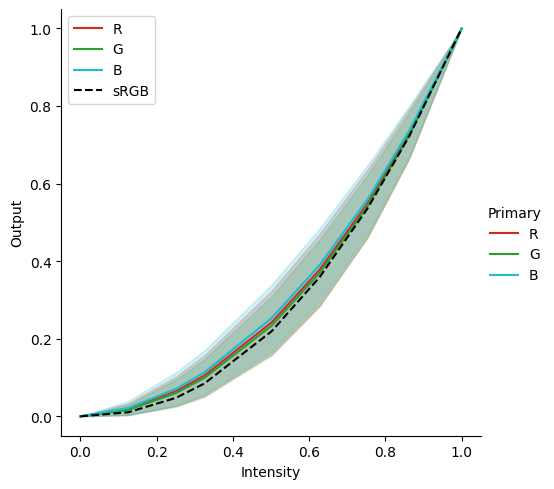

In [23]:
x = np.array(intens)/255

data = {
    'Intensity': [],
    'Output': [],
    'Primary': []
}

for mon in mons:
    data['Intensity'].append(list(x) + list(x) + list(x))
    data['Output'].append(list(np.power(x, mon.monGamma[0])) + list(np.power(x, mon.monGamma[1])) + list(np.power(x, mon.monGamma[2])))
    data['Primary'].append(['R']*len(x) + ['G']*len(x) + ['B']*len(x))

data['Intensity'] = np.array(data['Intensity']).flatten()
data['Output'] = np.array(data['Output']).flatten()
data['Primary'] = np.array(data['Primary']).flatten()

data = pd.DataFrame.from_dict(data)

sns.relplot(x="Intensity", y="Output", hue="Primary", kind="line", errorbar="sd", data=data, palette=rgb_palette)
plt.plot(x, np.power(x, 2.2), color="black", linestyle="dashed", label='sRGB')
plt.legend()

Gamma diff of 0.2 noticeable to enthusiasts
Gamma diff of 0.2+ noticeable to everyone


/home/me/.pyenv/versions/3.11.4/envs/robenv_latest/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


[2.1572936403994447, 0.042961860980535928]

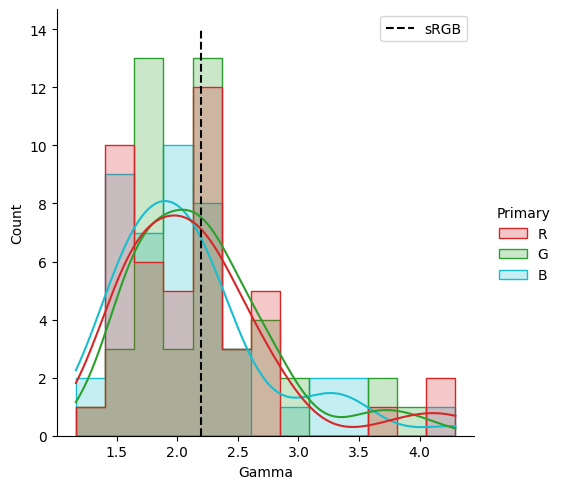

In [24]:
rgs = np.zeros((len(mons)))
ggs = np.zeros((len(mons)))
bgs = np.zeros((len(mons)))
for i in range(len(mons)):
    rgs[i] = mons[i].monGamma[0]
    ggs[i] = mons[i].monGamma[1]
    bgs[i] = mons[i].monGamma[2]

print('Gamma diff of 0.2 noticeable to enthusiasts')
print('Gamma diff of 0.2+ noticeable to everyone')

data = pd.DataFrame({
    'Gamma': list(rgs) + list(ggs) + list(bgs),
    'Primary': ['R']*len(rgs) + ['G']*len(ggs) + ['B']*len(bgs)
})
sns.displot(data, x='Gamma', hue='Primary', kde=True, element="step", palette=rgb_palette)
plt.plot([2.2, 2.2], [0, 14], color="black", linestyle="dashed", label='sRGB')
plt.legend()

[np.mean([np.mean(rgs), np.mean(ggs), np.mean(bgs)]), np.std([np.mean(rgs), np.mean(ggs), np.mean(bgs)])]

In [25]:
bs

['acer aspire e5-575g-5580/chrome',
 'macbook air 2020 m1/safari',
 'acer spin 3 n19w2/chrome',
 'lenovo ideapad 5 pro 14itl6/chrome',
 'acer aspire5 n20c4/chrome',
 'macbook pro 2019/safari',
 'dell latitude 7370 p67g/google chrome',
 'macbook air 2020 m1/safari',
 'ideapad flex5 14alc05/chrome',
 'lenovo ideapad5 15are05/firefox',
 'microsoft surface pto 6/edge',
 'lenovo ideapad 5 14iil05 i5/chrome',
 'samsung galaxy tab s7 fe wifi/chrome',
 'hp pavilion x360 14/chrome',
 'aspire an515-51 n17c1/firefox',
 'lenovo ideapad 120s-14iap/chrome',
 'macbook pro 13"2019/safari',
 'macbook air 2015/chrome',
 'packard bell q5wtc/chrome',
 'lenovo mt_20235 78cn25ww/chrome',
 'hp 255 g7 notebook pc/chrome',
 'ipad 2020/chrome',
 'acer aspire 5/mozilla firefox',
 'acer swift/chrome',
 'lenovo ideapad/chrome',
 'asus x550l notebook/chrome',
 'lenovo 80xr/chrome',
 'exper ultrabook-q5v/chrome',
 'acer swift sf314-42/firefox',
 'asus x541u notebook/ brave',
 'macbook air 2021 m1/google chrome',
 'a

In [26]:
for mon in mons:
    if mon.monGamma[0] > 3 or mon.monGamma[1] > 3 or mon.monGamma[2] > 3:
        for oidc in range(len(oids)):
            if str(oids[oidc]) == str(mon.name):
                print(bs[oidc])

macbook air 2015/chrome
packard bell q5wtc/chrome
asus vivobook m16021a-ej1129w. chrome
lenovo mt_20235 78cn25ww/chrome
asus x541u notebook/ brave
acer aspire 3 a315-51/chrome


In [27]:
wps_lab = np.zeros((len(mons), 3))
for i in range(len(mons)):
    wps_lab[i, :] = robsblobs.infamous_lab.xyz2lab(mons[i], mons[i].monXYZ[:, 0])

srgb_wp_lab = robsblobs.infamous_lab.xyz2lab_wo_mon(srgb_WP, srgb_XYZ[:, 0])

CCT diff >1000K is noticeable to everyone


/home/me/.pyenv/versions/3.11.4/envs/robenv_latest/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


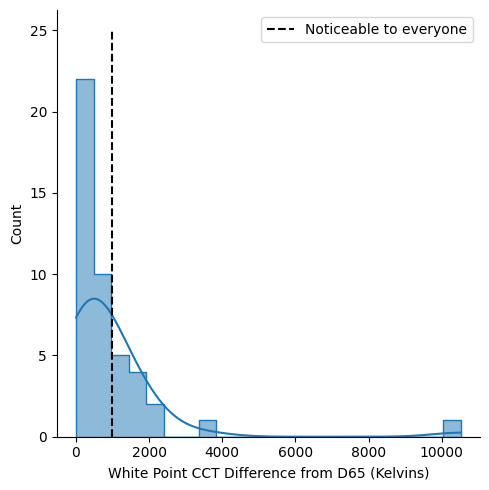

In [28]:
ccts = []
for mon in mons:
    xyY = robsblobs.cie_standard.XYZ2xyY(mon.monWP)
    xy = np.array([xyY[0], xyY[1]])
    ccts.append(colour.temperature.xy_to_CCT(xy, "Kang 2002"))

ccts = np.array(ccts)

ccts_diffs = []
for i in range(len(ccts)):
    ccts_diffs.append(np.abs(ccts[i] - 6500))

# fig, ax = plt.subplots(1, 1, figsize=(7, 7))
# ax.hist(ccts_diffs, bins=20)
data = pd.DataFrame({
    'White Point CCT Difference from D65 (Kelvins)': ccts_diffs,
})
sns.displot(data, x='White Point CCT Difference from D65 (Kelvins)', kde=True, element="step")
plt.plot([1000, 1000], [0, 25], color="black", linestyle="dashed", label='Noticeable to everyone')
plt.legend()

print('CCT diff >1000K is noticeable to everyone')

Text(0, 0.5, 'y')

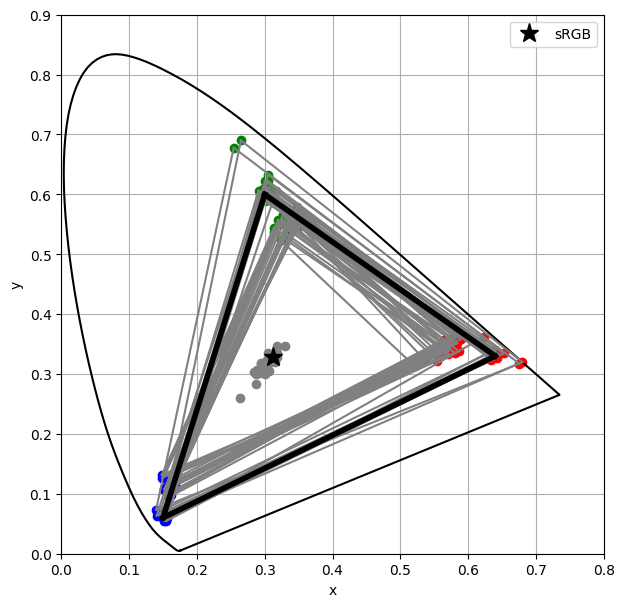

In [29]:
fig, ax = plt.subplots(1, 1, figsize = (7, 7))
plt.grid()

ax.plot(robsblobs.cie_standard.plank_lasso[:, 0], robsblobs.cie_standard.plank_lasso[:, 1], color="black")

for mon in mons:
    ax.plot([mon.monxyY[0, 0], mon.monxyY[1, 0]], [mon.monxyY[0, 1], mon.monxyY[1, 1]], color="gray")
    ax.plot([mon.monxyY[1, 0], mon.monxyY[2, 0]], [mon.monxyY[1, 1], mon.monxyY[2, 1]], color="gray")
    ax.plot([mon.monxyY[0, 0], mon.monxyY[2, 0]], [mon.monxyY[0, 1], mon.monxyY[2, 1]], color="gray")
    ax.scatter(mon.monxyY[0, 0], mon.monxyY[0, 1], color="red")
    ax.scatter(mon.monxyY[1, 0], mon.monxyY[1, 1], color="green")
    ax.scatter(mon.monxyY[2, 0], mon.monxyY[2, 1], color="blue")

    monWP_xy = robsblobs.cie_standard.XYZ2xy(mon.monWP)
    ax.plot(monWP_xy[0], monWP_xy[1], color="gray", marker="o")

ax.plot([srgb_xyY[0, 0], srgb_xyY[1, 0]], [srgb_xyY[0, 1], srgb_xyY[1, 1]], color="black", linewidth=4)
ax.plot([srgb_xyY[1, 0], srgb_xyY[2, 0]], [srgb_xyY[1, 1], srgb_xyY[2, 1]], color="black", linewidth=4)
ax.plot([srgb_xyY[0, 0], srgb_xyY[2, 0]], [srgb_xyY[0, 1], srgb_xyY[2, 1]], color="black", linewidth=4)

srgb_WP_xy = robsblobs.cie_standard.XYZ2xy(srgb_WP)
ax.plot(srgb_WP_xy[0], srgb_WP_xy[1], "k*", markersize=14, label="sRGB")
ax.legend()

ax.set_xlim((0, 0.8))
ax.set_ylim((0, 0.9))

ax.set_xlabel('x')
ax.set_ylabel('y')

[Text(1, 0, 'R'), Text(2, 0, 'G'), Text(3, 0, 'B')]

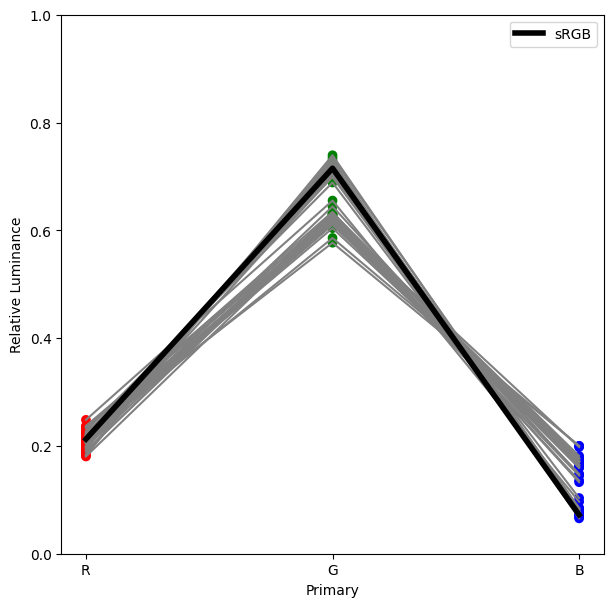

In [30]:
c = 0
rel_lums = np.zeros((len(mons), 3))
for mon in mons:
    rlum = mon.monxyY[0, 2]
    glum = mon.monxyY[1, 2]
    blum = mon.monxyY[2, 2]

    t = rlum + glum + blum
    rel_lums[c, :] = np.array([rlum/t, glum/t, blum/t])

    c += 1

srgb_rlum = srgb_xyY[0, 2]
srgb_glum = srgb_xyY[1, 2]
srgb_blum = srgb_xyY[2, 2]
t = srgb_rlum + srgb_glum + srgb_blum
rel_lum_srgb = np.array([srgb_rlum, srgb_glum, srgb_blum])/t

fig, ax = plt.subplots(1, 1, figsize=(7, 7))
for c in range(len(rel_lums)):
    ax.plot([1, 2, 3], rel_lums[c, :], color="gray")
    ax.scatter([1, 2, 3], rel_lums[c, :], c=["red", "green", "blue"])

ax.plot([1, 2, 3], rel_lum_srgb, color="black", linewidth=4, label="sRGB")
ax.legend()

ax.set_ylim((0, 1))
ax.set_xlabel('Primary')
ax.set_ylabel('Relative Luminance')
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['R', 'G', 'B'])

In [31]:
prims_lab = np.zeros((len(mons), 3, 3))
for i in range(len(mons)):
    prims_lab[i, 0, :] = robsblobs.infamous_lab.xyz2lab(mons[i], mons[i].monXYZ[:, 0])
    prims_lab[i, 1, :] = robsblobs.infamous_lab.xyz2lab(mons[i], mons[i].monXYZ[:, 1])
    prims_lab[i, 2, :] = robsblobs.infamous_lab.xyz2lab(mons[i], mons[i].monXYZ[:, 2])

srgb_lab = np.zeros((3, 3))
srgb_lab[0, :] = robsblobs.infamous_lab.xyz2lab_wo_mon(srgb_WP, srgb_XYZ[:, 0])
srgb_lab[1, :] = robsblobs.infamous_lab.xyz2lab_wo_mon(srgb_WP, srgb_XYZ[:, 1])
srgb_lab[2, :] = robsblobs.infamous_lab.xyz2lab_wo_mon(srgb_WP, srgb_XYZ[:, 2])

In [32]:
masterWP

array([  95.04151515,  522.14      ,  108.91606061])

Text(0, 0.5, 'b*')

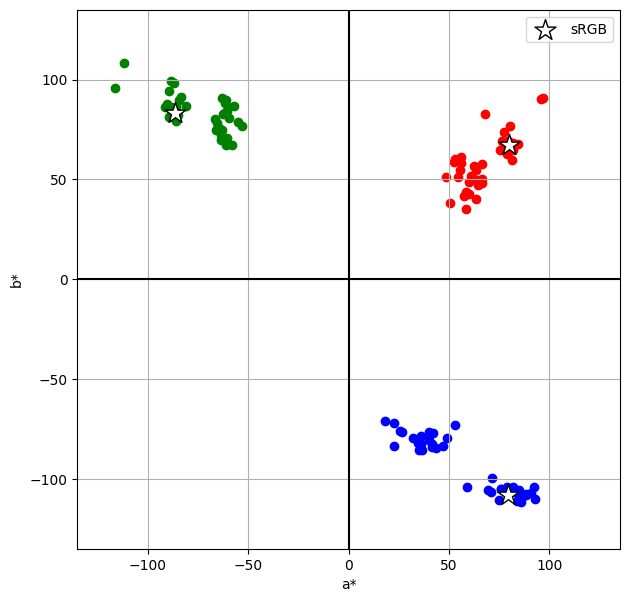

In [33]:
fig, ax = plt.subplots(1, 1, figsize = (7, 7))
plt.grid()

plt.plot(np.array([0, 0]), np.array([-135, 135]), color="black")
plt.plot(np.array([-135, 135]), np.array([0, 0]), color="black")

for i in range(len(prims_lab)):
    plt.scatter(prims_lab[i, 0, 1], prims_lab[i, 0, 2], color="red")
    plt.scatter(prims_lab[i, 1, 1], prims_lab[i, 1, 2], color="green")
    plt.scatter(prims_lab[i, 2, 1], prims_lab[i, 2, 2], color="blue")

plt.scatter(srgb_lab[0, 1], srgb_lab[0, 2], marker="*", s=250, c="white", edgecolors="black")
plt.scatter(srgb_lab[1, 1], srgb_lab[1, 2], marker="*", s=250, c="white", edgecolors="black")
plt.scatter(srgb_lab[2, 1], srgb_lab[2, 2], marker="*", s=250, c="white", edgecolors="black", label="sRGB")
plt.legend()

ax.set_xlim([-135, 135])
ax.set_ylim([-135, 135])

ax.set_xlabel('a*')
ax.set_ylabel('b*')

In [43]:
colour.XYZ_to_Luv(mons[0].monXYZ[:, 0], mons[i].monWP)

prims_LUV = np.zeros((len(mons), 3, 3))
for i in range(len(mons)):
    prims_LUV[i, 0, :] = robsblobs.uv_space.XYZ2LUV(mons[i], mons[i].monXYZ[:, 0])
    prims_LUV[i, 1, :] = robsblobs.uv_space.XYZ2LUV(mons[i], mons[i].monXYZ[:, 1])
    prims_LUV[i, 2, :] = robsblobs.uv_space.XYZ2LUV(mons[i], mons[i].monXYZ[:, 2])

srgb_LUV = np.zeros((3, 3))
srgb_LUV[0, :] = robsblobs.uv_space.XYZ2LUV_wo_mon(srgb_XYZ[:, 0], srgb_WP)
srgb_LUV[1, :] = robsblobs.uv_space.XYZ2LUV_wo_mon(srgb_XYZ[:, 1], srgb_WP)
srgb_LUV[2, :] = robsblobs.uv_space.XYZ2LUV_wo_mon(srgb_XYZ[:, 2], srgb_WP)

In [44]:
prims_LUV

array([[[  56.91517093,  219.05181521,   41.50907095],
        [  84.74964004, -113.57705054,  117.69848349],
        [  37.20077831,  -21.06986919, -137.01271433]],

       [[  52.66642798,  174.0958272 ,   32.09299331],
        [  88.1607257 ,  -81.5272361 ,   97.73433394],
        [  31.48067499,   -9.00655771, -127.86548172]],

       [[  50.7421283 ,  117.09813782,   31.01089081],
        [  83.57628284,  -46.84733413,  113.46830307],
        [  49.12796403,  -17.26339312, -126.05412825]],

       [[  49.5495776 ,  113.54422726,   48.15199358],
        [  83.01054507,  -42.49315877,  137.57835265],
        [  51.57965549,  -14.87825949, -130.70533995]],

       [[  53.95695942,  140.90782166,   35.95601122],
        [  82.0579308 ,  -56.85054405,   95.21640699],
        [  49.08204381,  -27.37775626, -119.57518001]],

       [[  49.73479009,  167.72895406,   42.38655962],
        [  88.66318582,  -76.43810857,  125.85357321],
        [  34.70096538,   -3.5693443 , -137.18361983]],

Text(0, 0.5, 'v*')

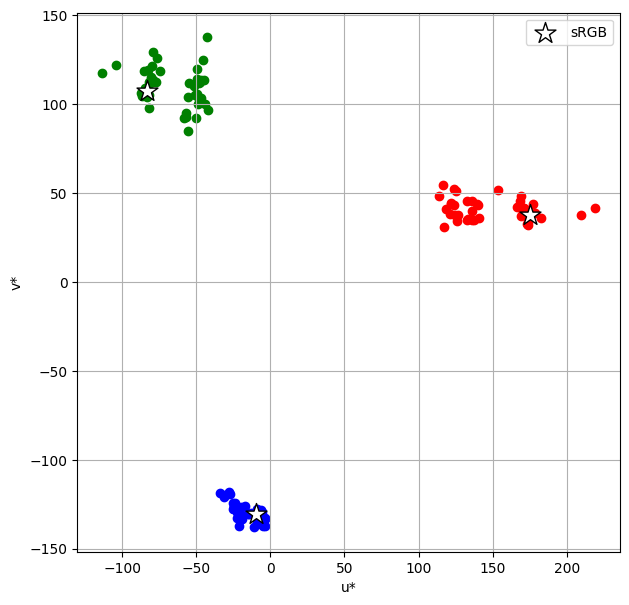

In [45]:
fig, ax = plt.subplots(1, 1, figsize = (7, 7))
plt.grid()

for i in range(len(prims_LUV)):
    plt.scatter(prims_LUV[i, 0, 1], prims_LUV[i, 0, 2], color="red")
    plt.scatter(prims_LUV[i, 1, 1], prims_LUV[i, 1, 2], color="green")
    plt.scatter(prims_LUV[i, 2, 1], prims_LUV[i, 2, 2], color="blue")

plt.scatter(srgb_LUV[0, 1], srgb_LUV[0, 2], marker="*", s=250, c="white", edgecolors="black")
plt.scatter(srgb_LUV[1, 1], srgb_LUV[1, 2], marker="*", s=250, c="white", edgecolors="black")
plt.scatter(srgb_LUV[2, 1], srgb_LUV[2, 2], marker="*", s=250, c="white", edgecolors="black", label="sRGB")
plt.legend()

# ax.set_xlim([0, 0.6])
# ax.set_ylim([0, 0.6])

ax.set_xlabel('u*')
ax.set_ylabel('v*')

/home/me/.pyenv/versions/3.11.4/envs/robenv_latest/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[20.165303963785028, 7.7888193159388504]

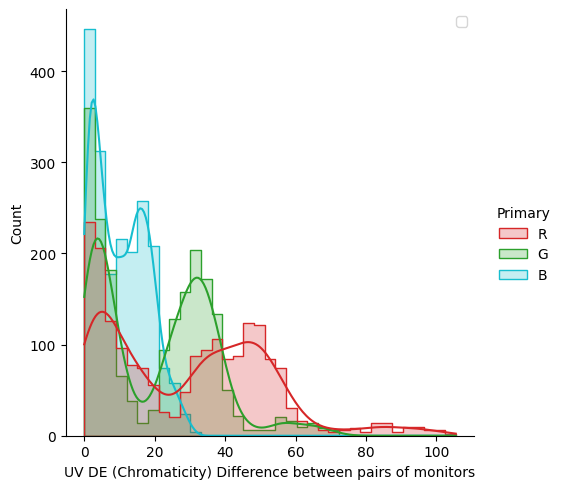

In [47]:
r_meanl = np.mean(prims_LUV[:, 0, 0], axis=0)
g_meanl = np.mean(prims_LUV[:, 1, 0], axis=0)
b_meanl = np.mean(prims_LUV[:, 2, 0], axis=0)

meanls = [r_meanl, g_meanl, b_meanl]

de00 = [[], [], []]
for i in range(len(prims_LUV)):
    for j in range(len(prims_LUV)):
        if i == j:
            continue
        
        for c in range(3):
            meanl = meanls[c]

            u1 = prims_LUV[i, c, 1]
            v1 = prims_LUV[i, c, 2]

            u2 = prims_LUV[j, c, 1]
            v2 = prims_LUV[j, c, 2]
        
            res = robsblobs.uv_space.LUV_chroma_DE([meanl, u1, v1], [meanl, u2, v2])
            de00[c].append(res)

data = pd.DataFrame({
    'UV DE (Chromaticity) Difference between pairs of monitors': list(de00[0]) + list(de00[1]) + list(de00[2]),
    'Primary': ['R']*len(de00[0]) + ['G']*len(de00[1]) + ['B']*len(de00[2])
})

sns.displot(data, x='UV DE (Chromaticity) Difference between pairs of monitors', hue='Primary', kde=True, element="step", palette=rgb_palette)
# plt.plot([1/13, 1/13], [0, 480], color="black", linestyle="dashed", label='Noticeable to enthusiasts')
# plt.plot([10, 10], [0, 220], color="orange", linestyle="dashed", label='Noticeable to everyone')
plt.legend()

[np.mean([np.mean(de00[0]), np.mean(de00[1]), np.mean(de00[2])]), np.std([np.mean(de00[0]), np.mean(de00[1]), np.mean(de00[2])])]

/home/me/.pyenv/versions/3.11.4/envs/robenv_latest/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[18.829630478525107, 7.725614515848898]

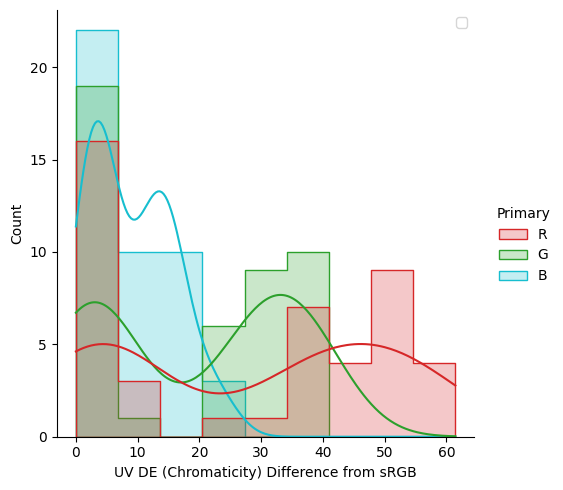

In [53]:
r_meanl = np.mean(prims_LUV[:, 0, 0], axis=0)
g_meanl = np.mean(prims_LUV[:, 1, 0], axis=0)
b_meanl = np.mean(prims_LUV[:, 2, 0], axis=0)

meanls = [r_meanl, g_meanl, b_meanl]

de00 = [[], [], []]
for i in range(len(prims_LUV)):
    for c in range(3):
        meanl = meanls[c]

        u1 = prims_LUV[i, c, 1]
        v1 = prims_LUV[i, c, 2]

        u2 = srgb_LUV[c, 1]
        v2 = srgb_LUV[c, 2]
    
        res = robsblobs.uv_space.LUV_chroma_DE([meanl, u1, v1], [meanl, u2, v2])
        de00[c].append(res)

data = pd.DataFrame({
    'UV DE (Chromaticity) Difference from sRGB': list(de00[0]) + list(de00[1]) + list(de00[2]),
    'Primary': ['R']*len(de00[0]) + ['G']*len(de00[1]) + ['B']*len(de00[2])
})

sns.displot(data, x='UV DE (Chromaticity) Difference from sRGB', hue='Primary', kde=True, element="step", palette=rgb_palette)
# plt.plot([5, 5], [0, 25], color="black", linestyle="dashed", label='Noticeable to enthusiasts')
# plt.plot([10, 10], [0, 25], color="orange", linestyle="dashed", label='Noticeable to everyone')
plt.legend()

[np.mean([np.mean(de00[0]), np.mean(de00[1]), np.mean(de00[2])]), np.std([np.mean(de00[0]), np.mean(de00[1]), np.mean(de00[2])])]

/home/me/.pyenv/versions/3.11.4/envs/robenv_latest/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0, 0.5, 'b*')

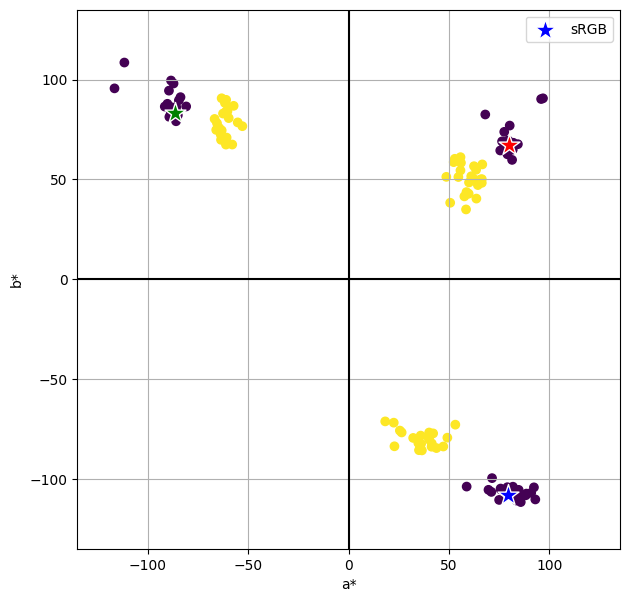

In [54]:
from sklearn.cluster import KMeans

rabs = prims_lab[:, 0, 1:3].squeeze()
gabs = prims_lab[:, 1, 1:3].squeeze()
babs = prims_lab[:, 2, 1:3].squeeze()

y_pred = KMeans(n_clusters=2, random_state=0).fit_predict(rabs)

fig, ax = plt.subplots(1, 1, figsize = (7, 7))
plt.grid()

plt.plot(np.array([0, 0]), np.array([-135, 135]), color="black")
plt.plot(np.array([-135, 135]), np.array([0, 0]), color="black")

plt.scatter(rabs[:, 0], rabs[:, 1], c=y_pred)
plt.scatter(gabs[:, 0], gabs[:, 1], c=y_pred)
plt.scatter(babs[:, 0], babs[:, 1], c=y_pred)

plt.scatter(srgb_lab[0, 1], srgb_lab[0, 2], marker="*", s=250, c="red", edgecolors="white")
plt.scatter(srgb_lab[1, 1], srgb_lab[1, 2], marker="*", s=250, c="green", edgecolors="white")
plt.scatter(srgb_lab[2, 1], srgb_lab[2, 2], marker="*", s=250, c="blue", edgecolors="white", label="sRGB")
plt.legend()

ax.set_xlim([-135, 135])
ax.set_ylim([-135, 135])

ax.set_xlabel('a*')
ax.set_ylabel('b*')

Text(0, 0.5, 'b*')

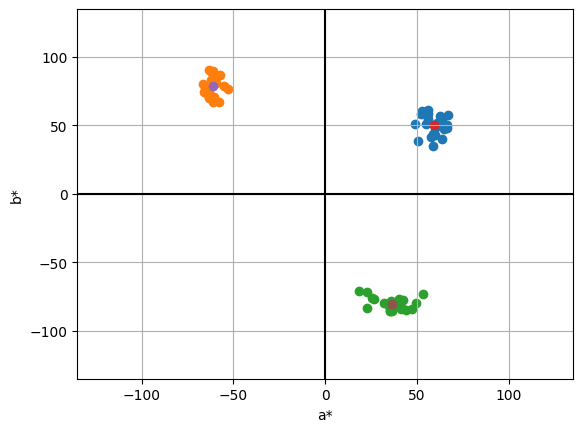

In [55]:
rabs_small = rabs[y_pred == 1, :]
gabs_small = gabs[y_pred == 1, :]
babs_small = babs[y_pred == 1, :]

small_gamut_lab = np.zeros((3, 3))
small_gamut_lab[0, 0] = np.mean(prims_lab[y_pred == 1, 0, 0].squeeze(), axis=0)
small_gamut_lab[1, 0] = np.mean(prims_lab[y_pred == 1, 1, 0].squeeze(), axis=0)
small_gamut_lab[2, 0] = np.mean(prims_lab[y_pred == 1, 2, 0].squeeze(), axis=0)
small_gamut_lab[0, 1:3] = np.mean(rabs_small, axis=0)
small_gamut_lab[1, 1:3] = np.mean(gabs_small, axis=0)
small_gamut_lab[2, 1:3] = np.mean(babs_small, axis=0)

plt.grid()

plt.plot(np.array([0, 0]), np.array([-135, 135]), color="black")
plt.plot(np.array([-135, 135]), np.array([0, 0]), color="black")

plt.scatter(rabs_small[:, 0], rabs_small[:, 1])
plt.scatter(gabs_small[:, 0], gabs_small[:, 1])
plt.scatter(babs_small[:, 0], babs_small[:, 1])

plt.scatter(small_gamut_lab[0, 1], small_gamut_lab[0, 2])
plt.scatter(small_gamut_lab[1, 1], small_gamut_lab[1, 2])
plt.scatter(small_gamut_lab[2, 1], small_gamut_lab[2, 2])

plt.xlim([-135, 135])
plt.ylim([-135, 135])

plt.xlabel('a*')
plt.ylabel('b*')

Text(0, 0.5, 'v*')

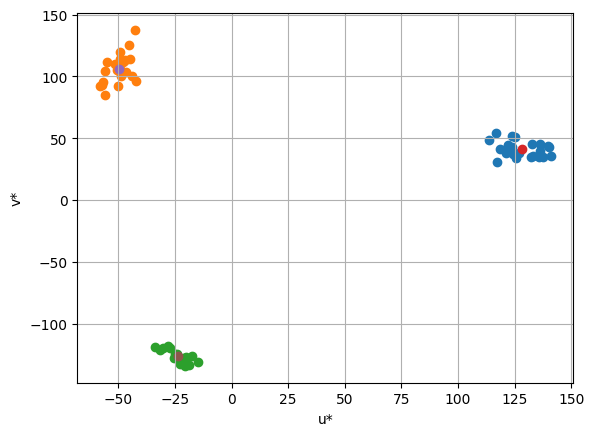

In [58]:
ruvs = prims_LUV[:, 0, 1:3].squeeze()
guvs = prims_LUV[:, 1, 1:3].squeeze()
buvs = prims_LUV[:, 2, 1:3].squeeze()

ruvs_small = ruvs[y_pred == 1, :]
guvs_small = guvs[y_pred == 1, :]
buvs_small = buvs[y_pred == 1, :]

small_gamut_LUV = np.zeros((3, 3))
small_gamut_LUV[0, 0] = np.mean(prims_LUV[y_pred == 1, 0, 0].squeeze(), axis=0)
small_gamut_LUV[1, 0] = np.mean(prims_LUV[y_pred == 1, 1, 0].squeeze(), axis=0)
small_gamut_LUV[2, 0] = np.mean(prims_LUV[y_pred == 1, 2, 0].squeeze(), axis=0)
small_gamut_LUV[0, 1:3] = np.mean(ruvs_small, axis=0)
small_gamut_LUV[1, 1:3] = np.mean(guvs_small, axis=0)
small_gamut_LUV[2, 1:3] = np.mean(buvs_small, axis=0)

plt.grid()

plt.scatter(ruvs_small[:, 0], ruvs_small[:, 1])
plt.scatter(guvs_small[:, 0], guvs_small[:, 1])
plt.scatter(buvs_small[:, 0], buvs_small[:, 1])

plt.scatter(small_gamut_LUV[0, 1], small_gamut_LUV[0, 2])
plt.scatter(small_gamut_LUV[1, 1], small_gamut_LUV[1, 2])
plt.scatter(small_gamut_LUV[2, 1], small_gamut_LUV[2, 2])

plt.xlabel('u*')
plt.ylabel('v*')

[5.5305935254134182, 1.9043958659150877]
[4.7811999477754261, 1.7875464763872462]


/home/me/.pyenv/versions/3.11.4/envs/robenv_latest/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


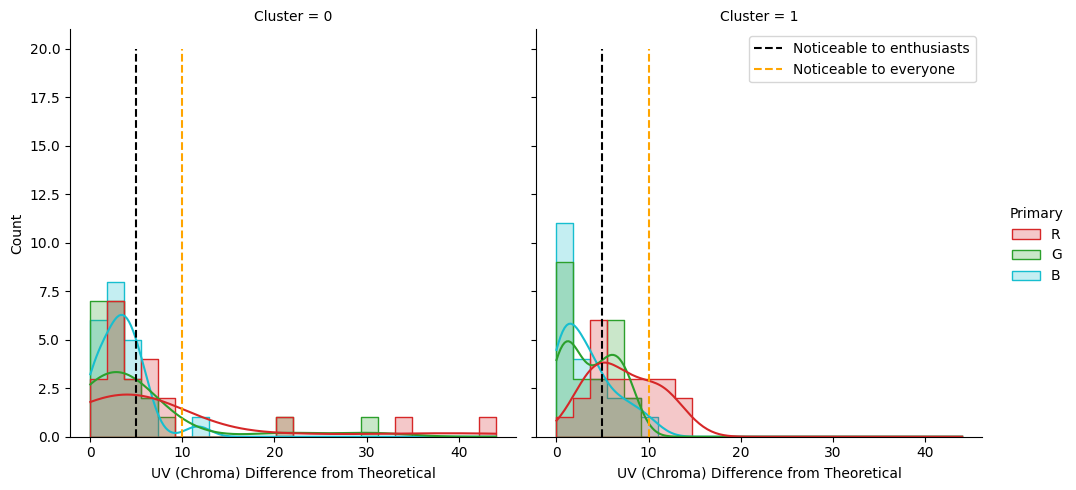

In [60]:
data = {
    'UV (Chroma) Difference from Theoretical': [],
    'Primary': [],
    'Cluster': []
}

for clust in range(2):
    prims_clust_LUV = prims_LUV[y_pred == clust, :, :]

    r_meanl = np.mean(prims_clust_LUV[:, 0, 0], axis=0)
    g_meanl = np.mean(prims_clust_LUV[:, 1, 0], axis=0)
    b_meanl = np.mean(prims_clust_LUV[:, 2, 0], axis=0)

    meanls = [r_meanl, g_meanl, b_meanl]

    de00 = [[], [], []]
    for i in range(len(prims_clust_LUV)):
        for c in range(3):
            meanl = meanls[c]

            u1 = prims_clust_LUV[i, c, 1]
            v1 = prims_clust_LUV[i, c, 2]

            if clust == 0:
                u2 = srgb_LUV[c, 1]
                v2 = srgb_LUV[c, 2]
            else:
                u2 = small_gamut_LUV[c, 1]
                v2 = small_gamut_LUV[c, 2]
        
            res = robsblobs.uv_space.LUV_chroma_DE([meanl, u1, v1], [meanl, u2, v2])
            de00[c].append(res)

    data['UV (Chroma) Difference from Theoretical'].extend(de00[0] + de00[1] + de00[2])
    data['Primary'].extend(['R']*len(de00[0]) + ['G']*len(de00[1]) + ['B']*len(de00[2]))
    data['Cluster'].extend([clust]*len(de00[0]) + [clust]*len(de00[1]) + [clust]*len(de00[2]))

    print([np.mean([np.mean(de00[0]), np.mean(de00[1]), np.mean(de00[2])]), np.std([np.mean(de00[0]), np.mean(de00[1]), np.mean(de00[2])])])

data['UV (Chroma) Difference from Theoretical'] = np.array(data['UV (Chroma) Difference from Theoretical']).flatten()
data['Primary'] = np.array(data['Primary']).flatten()
data['Cluster'] = np.array(data['Cluster']).flatten()

g = sns.displot(data, x='UV (Chroma) Difference from Theoretical', hue='Primary', col='Cluster', kde=True, element="step", palette=rgb_palette)
for col_val, ax in g.axes_dict.items():
    ax.plot([5, 5], [0, 20], color="black", linestyle="dashed", label='Noticeable to enthusiasts')
    ax.plot([10, 10], [0, 20], color="orange", linestyle="dashed", label='Noticeable to everyone')

ax.legend()

/home/me/.pyenv/versions/3.11.4/envs/robenv_latest/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


[[53.003269716946669, 85.180837714782101, 40.964882736947956],
 [1.5600294901651584, 2.5455512982640838, 7.322308873247561]]

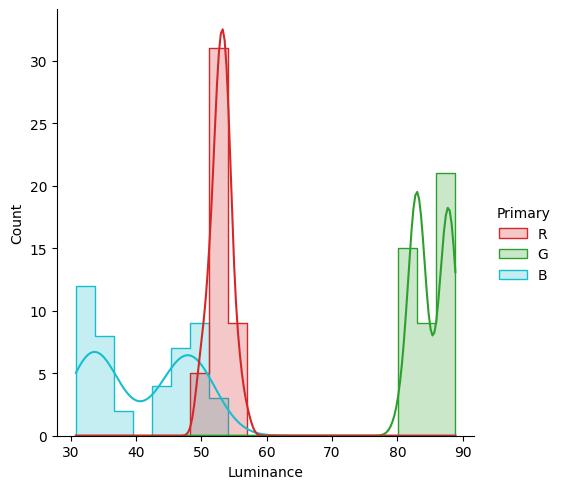

In [ ]:
rls = prims_lab[:, 0, 0]
gls = prims_lab[:, 1, 0]
bls = prims_lab[:, 2, 0]

data = pd.DataFrame({
    'Luminance': list(rls) + list(gls) + list(bls),
    'Primary': ['R']*len(rls) + ['G']*len(gls) + ['B']*len(bls)
})
sns.displot(data, x='Luminance', hue='Primary', kde=True, element="step", bins=20, palette=rgb_palette)

[[np.mean(rls), np.mean(gls), np.mean(bls)], [np.std(rls), np.std(gls), np.std(bls)]]

(array([ 2.,  0.,  3.,  0.,  4.,  5.,  5.,  1.,  0.,  3.]),
 array([ 43.17482147,  44.04180718,  44.90879289,  45.77577859,
         46.6427643 ,  47.50975001,  48.37673571,  49.24372142,
         50.11070713,  50.97769283,  51.84467854]),
 <BarContainer object of 10 artists>)

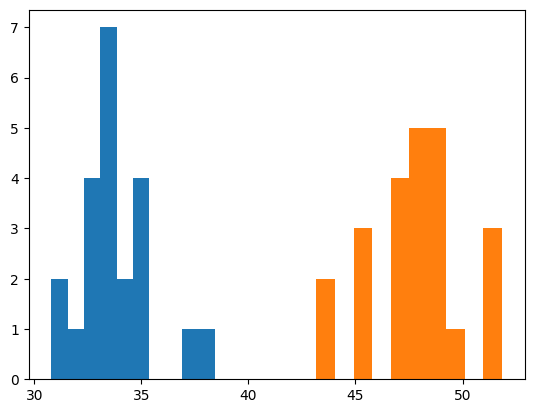

In [ ]:
plt.hist(bls[y_pred == 0])
plt.hist(bls[y_pred == 1])

/home/me/.pyenv/versions/3.11.4/envs/robenv_latest/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


[6.3910161255940041, 1.9629136611316254]

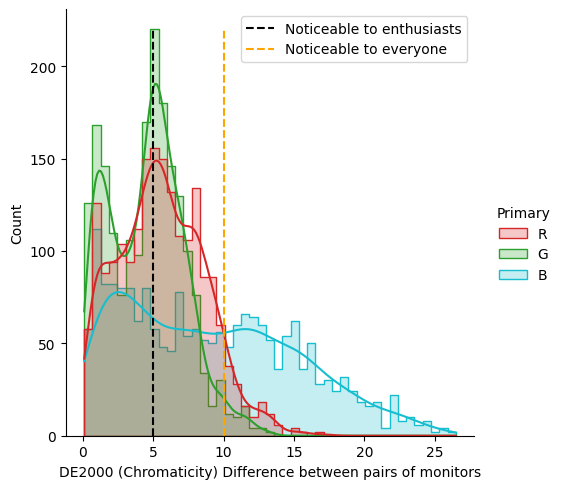

In [ ]:
r_meanl = np.mean(prims_lab[:, 0, 0], axis=0)
g_meanl = np.mean(prims_lab[:, 1, 0], axis=0)
b_meanl = np.mean(prims_lab[:, 2, 0], axis=0)

meanls = [r_meanl, g_meanl, b_meanl]

de00 = [[], [], []]
for i in range(len(prims_lab)):
    for j in range(len(prims_lab)):
        if i == j:
            continue
        
        for c in range(3):
            meanl = meanls[c]

            a1 = prims_lab[i, c, 1]
            b1 = prims_lab[i, c, 2]

            a2 = prims_lab[j, c, 1]
            b2 = prims_lab[j, c, 2]
        
            res = ciede2000((meanl, a1, b1), (meanl, a2, b2))
            de00[c].append(res['delta_E_00'])

data = pd.DataFrame({
    'DE2000 (Chromaticity) Difference between pairs of monitors': list(de00[0]) + list(de00[1]) + list(de00[2]),
    'Primary': ['R']*len(de00[0]) + ['G']*len(de00[1]) + ['B']*len(de00[2])
})

sns.displot(data, x='DE2000 (Chromaticity) Difference between pairs of monitors', hue='Primary', kde=True, element="step", palette=rgb_palette)
plt.plot([5, 5], [0, 220], color="black", linestyle="dashed", label='Noticeable to enthusiasts')
plt.plot([10, 10], [0, 220], color="orange", linestyle="dashed", label='Noticeable to everyone')
plt.legend()

[np.mean([np.mean(de00[0]), np.mean(de00[1]), np.mean(de00[2])]), np.std([np.mean(de00[0]), np.mean(de00[1]), np.mean(de00[2])])]

[2.830385726186639, 0.46682665047027044]
[4.3470689535513882, 1.2410041502028775]


/home/me/.pyenv/versions/3.11.4/envs/robenv_latest/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


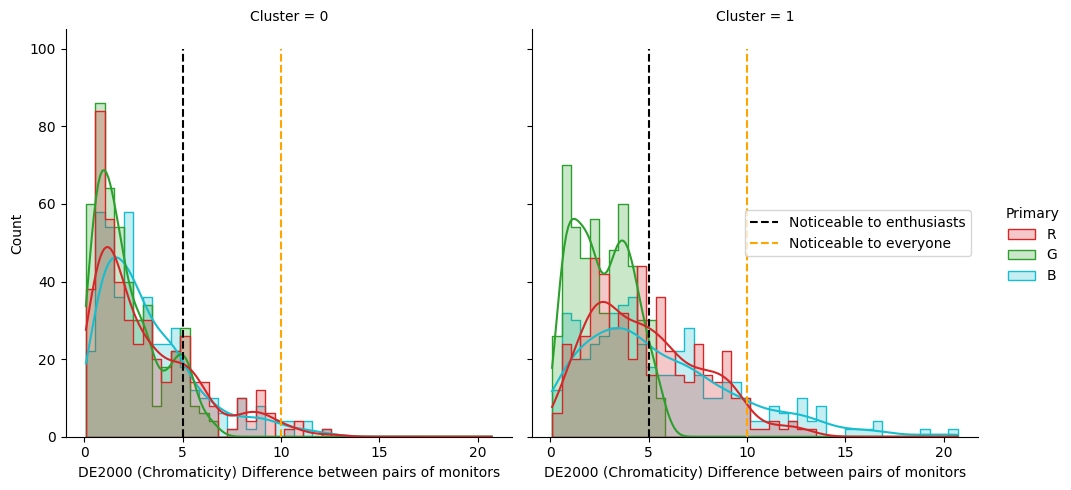

In [ ]:
data = {
    'DE2000 (Chromaticity) Difference between pairs of monitors': [],
    'Primary': [],
    'Cluster': []
}

# fig, axs = plt.subplots(2, 3, figsize=(21, 12), sharex=True, sharey=True)
for clust in range(2):
    prims_clust_lab = prims_lab[y_pred == clust, :, :]

    r_meanl = np.mean(prims_clust_lab[:, 0, 0], axis=0)
    g_meanl = np.mean(prims_clust_lab[:, 1, 0], axis=0)
    b_meanl = np.mean(prims_clust_lab[:, 2, 0], axis=0)

    meanls = [r_meanl, g_meanl, b_meanl]

    de00 = [[], [], []]
    for i in range(len(prims_clust_lab)):
        for j in range(len(prims_clust_lab)):
            if i == j:
                continue
            
            for c in range(3):
                meanl = meanls[c]

                a1 = prims_clust_lab[i, c, 1]
                b1 = prims_clust_lab[i, c, 2]

                a2 = prims_clust_lab[j, c, 1]
                b2 = prims_clust_lab[j, c, 2]
            
                res = ciede2000((meanl, a1, b1), (meanl, a2, b2))
                de00[c].append(res['delta_E_00'])

    data['DE2000 (Chromaticity) Difference between pairs of monitors'].extend(de00[0] + de00[1] + de00[2])
    data['Primary'].extend(['R']*len(de00[0]) + ['G']*len(de00[1]) + ['B']*len(de00[2]))
    data['Cluster'].extend([clust]*len(de00[0]) + [clust]*len(de00[1]) + [clust]*len(de00[2]))

    print([np.mean([np.mean(de00[0]), np.mean(de00[1]), np.mean(de00[2])]), np.std([np.mean(de00[0]), np.mean(de00[1]), np.mean(de00[2])])])

data['DE2000 (Chromaticity) Difference between pairs of monitors'] = np.array(data['DE2000 (Chromaticity) Difference between pairs of monitors']).flatten()
data['Primary'] = np.array(data['Primary']).flatten()
data['Cluster'] = np.array(data['Cluster']).flatten()

g = sns.displot(data, x='DE2000 (Chromaticity) Difference between pairs of monitors', hue='Primary', col='Cluster', kde=True, element="step", palette=rgb_palette)
for col_val, ax in g.axes_dict.items():
    ax.plot([5, 5], [0, 100], color="black", linestyle="dashed", label='Noticeable to enthusiasts')
    ax.plot([10, 10], [0, 100], color="orange", linestyle="dashed", label='Noticeable to everyone')

ax.legend()

/home/me/.pyenv/versions/3.11.4/envs/robenv_latest/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


[5.3016760325280003, 1.7341800241076093]

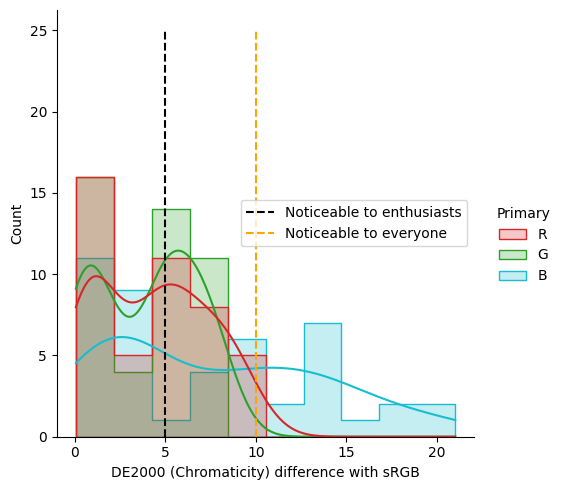

In [ ]:
r_meanl = np.mean(prims_lab[:, 0, 0], axis=0)
g_meanl = np.mean(prims_lab[:, 1, 0], axis=0)
b_meanl = np.mean(prims_lab[:, 2, 0], axis=0)

meanls = [r_meanl, g_meanl, b_meanl]

de00 = [[], [], []]
for i in range(len(prims_lab)):
    for c in range(3):
        meanl = meanls[c]

        a1 = prims_lab[i, c, 1]
        b1 = prims_lab[i, c, 2]

        a2 = srgb_lab[c, 1]
        b2 = srgb_lab[c, 2]
    
        res = ciede2000((meanl, a1, b1), (meanl, a2, b2))
        de00[c].append(res['delta_E_00'])

data = pd.DataFrame({
    'DE2000 (Chromaticity) difference with sRGB': list(de00[0]) + list(de00[1]) + list(de00[2]),
    'Primary': ['R']*len(de00[0]) + ['G']*len(de00[1]) + ['B']*len(de00[2])
})

sns.displot(data, x='DE2000 (Chromaticity) difference with sRGB', hue='Primary', kde=True, element="step", palette=rgb_palette)
plt.plot([5, 5], [0, 25], color="black", linestyle="dashed", label='Noticeable to enthusiasts')
plt.plot([10, 10], [0, 25], color="orange", linestyle="dashed", label='Noticeable to everyone')
plt.legend()

[np.mean([np.mean(de00[0]), np.mean(de00[1]), np.mean(de00[2])]), np.std([np.mean(de00[0]), np.mean(de00[1]), np.mean(de00[2])])]

[1.9922157681131418, 0.42104058166060665]
[3.0859440458698053, 0.79278451971621811]


/home/me/.pyenv/versions/3.11.4/envs/robenv_latest/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


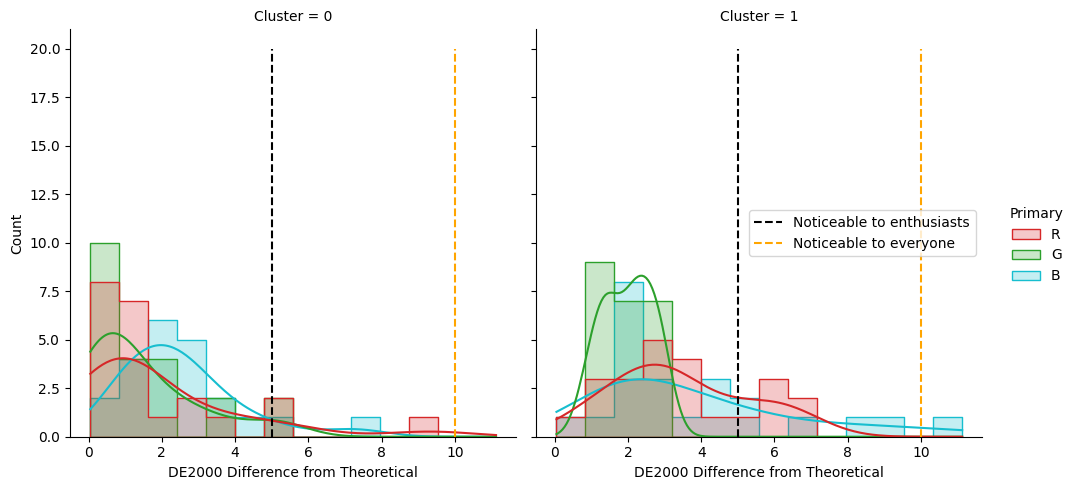

In [ ]:
data = {
    'DE2000 Difference from Theoretical': [],
    'Primary': [],
    'Cluster': []
}

for clust in range(2):
    prims_clust_lab = prims_lab[y_pred == clust, :, :]

    r_meanl = np.mean(prims_clust_lab[:, 0, 0], axis=0)
    g_meanl = np.mean(prims_clust_lab[:, 1, 0], axis=0)
    b_meanl = np.mean(prims_clust_lab[:, 2, 0], axis=0)

    meanls = [r_meanl, g_meanl, b_meanl]

    de00 = [[], [], []]
    for i in range(len(prims_clust_lab)):
        for c in range(3):
            meanl = meanls[c]

            a1 = prims_clust_lab[i, c, 1]
            b1 = prims_clust_lab[i, c, 2]

            if clust == 0:
                a2 = srgb_lab[c, 1]
                b2 = srgb_lab[c, 2]
            else:
                a2 = small_gamut_lab[c, 1]
                b2 = small_gamut_lab[c, 2]
        
            res = ciede2000((meanl, a1, b1), (meanl, a2, b2))
            de00[c].append(res['delta_E_00'])

    data['DE2000 Difference from Theoretical'].extend(de00[0] + de00[1] + de00[2])
    data['Primary'].extend(['R']*len(de00[0]) + ['G']*len(de00[1]) + ['B']*len(de00[2]))
    data['Cluster'].extend([clust]*len(de00[0]) + [clust]*len(de00[1]) + [clust]*len(de00[2]))

    print([np.mean([np.mean(de00[0]), np.mean(de00[1]), np.mean(de00[2])]), np.std([np.mean(de00[0]), np.mean(de00[1]), np.mean(de00[2])])])

data['DE2000 Difference from Theoretical'] = np.array(data['DE2000 Difference from Theoretical']).flatten()
data['Primary'] = np.array(data['Primary']).flatten()
data['Cluster'] = np.array(data['Cluster']).flatten()

g = sns.displot(data, x='DE2000 Difference from Theoretical', hue='Primary', col='Cluster', kde=True, element="step", palette=rgb_palette)
for col_val, ax in g.axes_dict.items():
    ax.plot([5, 5], [0, 20], color="black", linestyle="dashed", label='Noticeable to enthusiasts')
    ax.plot([10, 10], [0, 20], color="orange", linestyle="dashed", label='Noticeable to everyone')

ax.legend()